# Imports

In [1]:
from google.colab import drive
# Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Carga da Base e Tratamento do cabeçalho

In [3]:
path_mesa = '/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/ExpMesa.csv'
path_expumantes = '/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/ExpEspumantes.csv'
path_suco = '/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/ExpSuco.csv'
path_uva = '/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/ExpUva.csv'

df_mesa = pd.read_csv(path_mesa, sep=';', index_col=None, header=None)
df_mesa = df_mesa.T
df_mesa.columns = df_mesa.iloc[1]
df_mesa = df_mesa.iloc[2:].copy()

df_expumantes = pd.read_csv(path_expumantes, sep=';', index_col=None, header=None)
df_expumantes = df_expumantes.T
df_expumantes.columns = df_expumantes.iloc[1]
df_expumantes = df_expumantes.iloc[2:].copy()

df_suco = pd.read_csv(path_suco, sep=';', index_col=None, header=None)
df_suco = df_suco.T
df_suco.columns = df_suco.iloc[1]
df_suco = df_suco.iloc[2:].copy()

df_uva = pd.read_csv(path_uva, sep=';', index_col=None, header=None)
df_uva = df_uva.T
df_uva.columns = df_uva.iloc[1]
df_uva = df_uva.iloc[2:].copy()

# Tratamento da Base

In [4]:
# lista de anos para as bases
anos  = [x for x in range(1970, 2020)]

## Vinhos de Mesa

In [5]:
# Seleciona linhas pares e ímpares
df_mesa_litros = df_mesa.iloc[::2, :]
df_mesa_dolares = df_mesa.iloc[1::2, :]

# Incluindo uma coluna com os anos
df_mesa_litros['Ano'] = anos
df_mesa_dolares['Ano'] = anos

# Incluindo coluna para identificar a base
df_mesa_litros['Tipo'] = 'Vinho de Mesa'
df_mesa_dolares['Tipo'] = 'Vinho de Mesa'

# Aplicando a função melt
df_mesa_litros = pd.melt(df_mesa_litros, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Litros')
df_mesa_dolares = pd.melt(df_mesa_dolares, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Dolares')

## Expumantes

In [6]:
# Seleciona linhas pares e ímpares
df_expumantes_litros = df_expumantes.iloc[::2, :]
df_expumantes_dolares = df_expumantes.iloc[1::2, :]

# Incluindo uma coluna com os anos
df_expumantes_litros['Ano'] = anos
df_expumantes_dolares['Ano'] = anos

# Incluindo coluna para identificar a base
df_expumantes_litros['Tipo'] = 'Expumantes'
df_expumantes_dolares['Tipo'] = 'Expumantes'

# Aplicando a função melt
df_expumantes_litros = pd.melt(df_expumantes_litros, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Litros')
df_expumantes_dolares = pd.melt(df_expumantes_dolares, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Dolares')

## Suco

In [7]:
# Seleciona linhas pares e ímpares
df_suco_litros = df_suco.iloc[::2, :]
df_suco_dolares = df_suco.iloc[1::2, :]

# Incluindo uma coluna com os anos
df_suco_litros['Ano'] = anos
df_suco_dolares['Ano'] = anos

# Incluindo coluna para identificar a base
df_suco_litros['Tipo'] = 'Suco'
df_suco_dolares['Tipo'] = 'Suco'

# Aplicando a função melt
df_suco_litros = pd.melt(df_suco_litros, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Litros')
df_suco_dolares = pd.melt(df_suco_dolares, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Dolares')

## Uva

In [8]:
# Seleciona linhas pares e ímpares
df_uva_litros = df_uva.iloc[::2, :]
df_uva_dolares = df_uva.iloc[1::2, :]

# Incluindo uma coluna com os anos
df_uva_litros['Ano'] = anos
df_uva_dolares['Ano'] = anos

# Incluindo coluna para identificar a base
df_uva_litros['Tipo'] = 'Uva'
df_uva_dolares['Tipo'] = 'Uva'

# Aplicando a função melt
df_uva_litros = pd.melt(df_uva_litros, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Litros')
df_uva_dolares = pd.melt(df_uva_dolares, id_vars=['Ano', 'Tipo'], var_name='País', value_name='Dolares')

## Concatenando as bases

In [9]:
df_exp_litros = pd.concat([df_mesa_litros,
                           df_expumantes_litros,
                           df_suco_litros,
                           df_uva_litros])
df_exp_dolares = pd.concat([df_mesa_dolares,
                           df_expumantes_dolares,
                           df_suco_dolares,
                           df_uva_dolares])

In [10]:
df_exp_litros['Dolares'] = df_exp_dolares['Dolares']
df_exp = df_exp_litros.copy()
df_exp.head()

,Ano,Tipo,País,Litros,Dolares
0,1970,Vinho de Mesa,África do Sul,0,0
1,1971,Vinho de Mesa,África do Sul,0,0
2,1972,Vinho de Mesa,África do Sul,0,0
3,1973,Vinho de Mesa,África do Sul,0,0
4,1974,Vinho de Mesa,África do Sul,0,0


# Análise Exploratória

## Gráfico de barras para visualizar a quantidade de exportação por ano

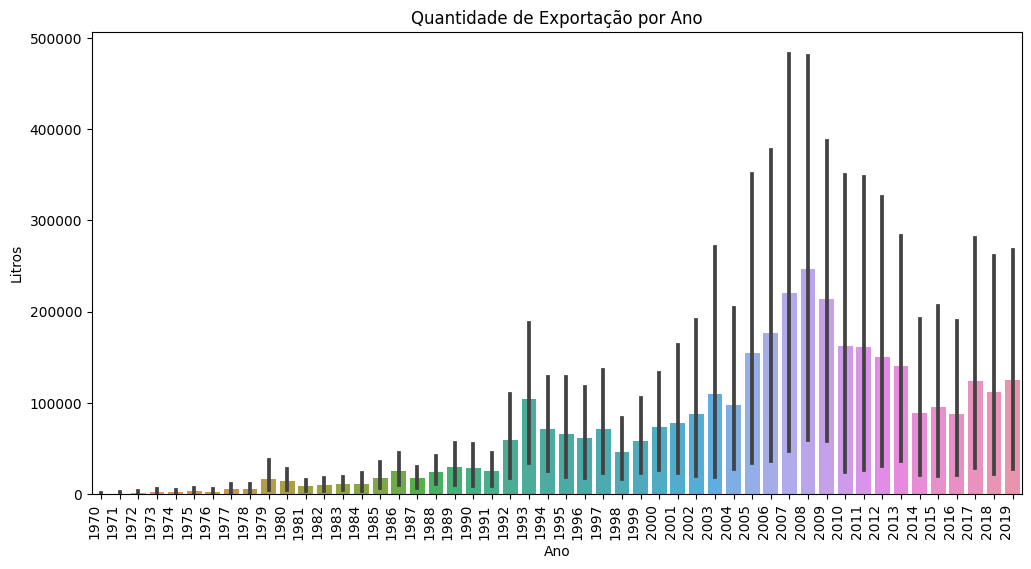

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Litros', data=df_exp)
plt.title('Quantidade de Exportação por Ano')
plt.xticks(rotation=90, ha='right')
plt.show()

## Gráfico de pizza para visualizar a distribuição por tipo de vinho

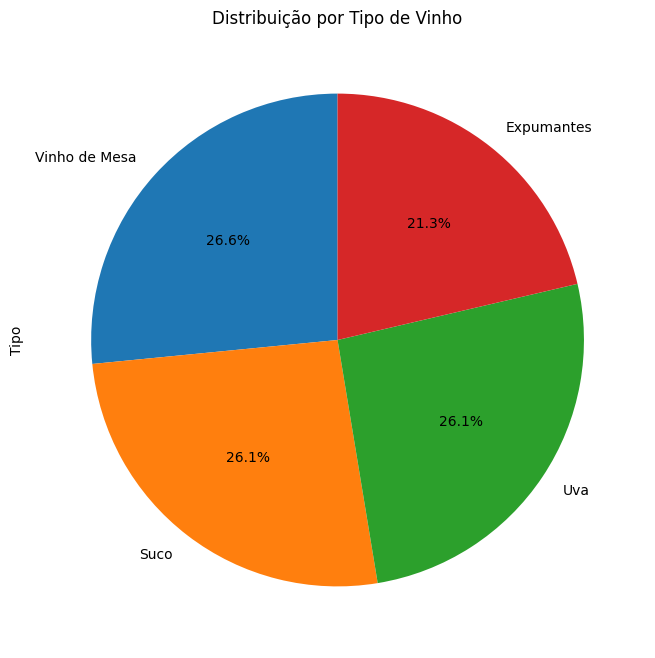

In [12]:
plt.figure(figsize=(8, 8))
df_exp_litros['Tipo'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Tipo de Vinho')
plt.show()

## Gráfico de barras para visualizar a quantidade de exportação por país (10 maiores)

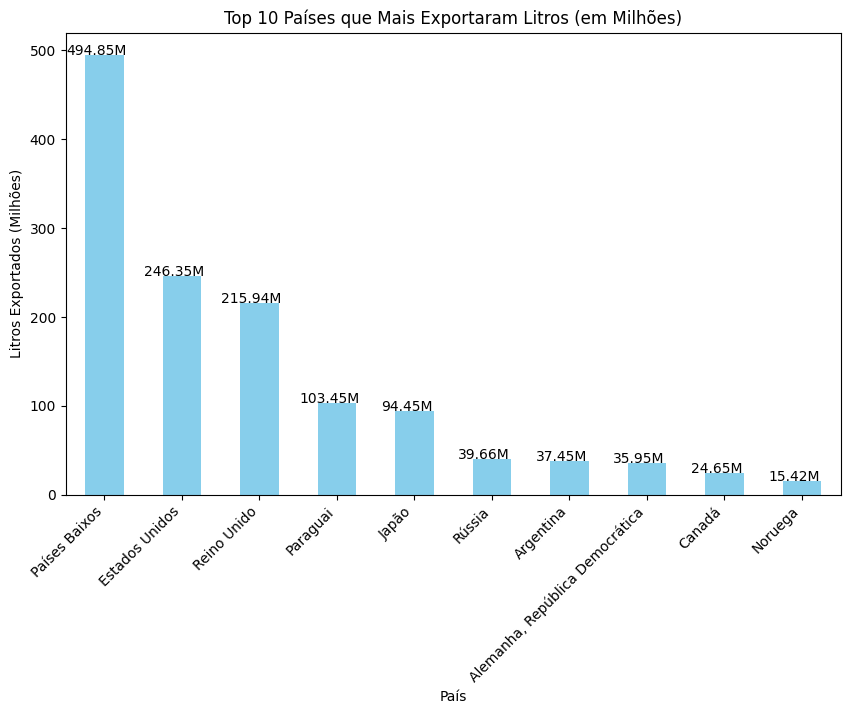

In [13]:
# Ordenando o DataFrame pela quantidade de litros em ordem decrescente
# Agrupar por país e soma os litros exportados
total_litros_por_pais = df_exp.groupby('País')['Litros'].sum()

# Ordenar em ordem decrescente e selecionar os top 10
top_10_paises = total_litros_por_pais.sort_values(ascending=False).head(10)

# Dividir os valores por 1.000.000 para obter milhões
top_10_paises_milhoes = top_10_paises / 1000000

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = top_10_paises_milhoes.plot(kind='bar', color='skyblue')

# Adicionar rótulos às barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{bar.get_height():,.2f}M', ha='center')

plt.title('Top 10 Países que Mais Exportaram Litros (em Milhões)')
plt.xlabel('País')
plt.ylabel('Litros Exportados (Milhões)')
plt.xticks(rotation=45, ha='right')
plt.show()

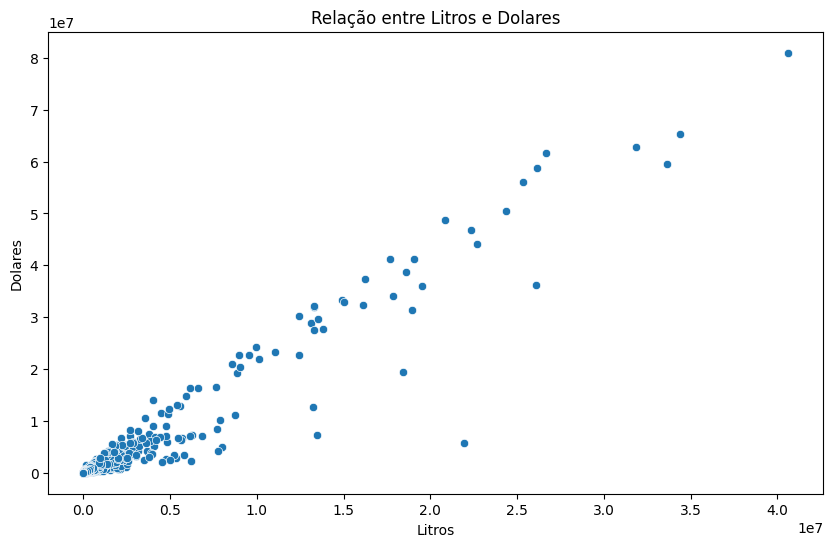

In [14]:
# Gráfico de dispersão para visualizar a relação entre Litros e Dolares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Litros', y='Dolares', data=df_exp)
plt.title('Relação entre Litros e Dolares')
plt.show()

In [15]:
df_exp.to_csv('/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/base_final.csv')